In [1]:
# libs para manipulação de dados
import numpy as np
import pandas as pd

# libs para visuzalização de dados
import matplotlib.pyplot as plt
import seaborn as sns

BASE_MUERTES_COVID = '../data/external/muertes-covid-por-pais.csv'
BASE_POBLACION = '../data/external/poblacion-por-pais.csv'

## Carregando as bases

In [2]:
lst_colunas = pd.read_csv(
    BASE_MUERTES_COVID,
    sep=',').columns

lst_colunas

[coluna.split() for coluna in lst_colunas]


[['pais'],
 ['fecha', 'inicio'],
 ['fecha', 'fin'],
 ['dias'],
 ['semana'],
 ['total', 'muertes', 'reportadas'],
 ['total', 'muertes', 'reportadas', 'por', 'covid']]

In [3]:
# Carregando base 'muertes-covid-por-pais.csv'
df_muertes_covid = pd.read_csv(
    BASE_MUERTES_COVID,
    sep=',',
    header=0,
    names=['pais', 'fecha_inicio', 'fecha_fin', 'dias', 'semana', 'total_muertes_reportadas', 'total_muertes_reportadas_por_covid'],
    parse_dates=['fecha_inicio', 'fecha_fin']
    )
print(f"Dimensões da df_muertes_covid: {df_muertes_covid.shape}")

# Carregando base 'poblacion-por-pais.csv'
df_poblacion = pd.read_csv(
    BASE_POBLACION,
    sep=',',
    header=0,
    names=['pais', 'poblacion']
    )
print(f"Dimensões da df_poblacion: {df_poblacion.shape}")

Dimensões da df_muertes_covid: (1332, 7)
Dimensões da df_poblacion: (5, 2)


In [4]:
df_muertes_covid.head()

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0


In [5]:
df_poblacion.head()

,pais,poblacion
0,Mexico,130262220
1,Peru,33359415
2,Chile,19212362
3,Brazil,213993441
4,Colombia,51265841


## Avaliando as bases

Devido à quantidade de registros, analisaremos somente a tabela 'df_muertes_covid'.

### Verificando nulos e valores incoerentes

In [6]:
df_muertes_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   pais                                1332 non-null   object        
 1   fecha_inicio                        1332 non-null   datetime64[ns]
 2   fecha_fin                           1332 non-null   datetime64[ns]
 3   dias                                1332 non-null   int64         
 4   semana                              1332 non-null   int64         
 5   total_muertes_reportadas            1332 non-null   int64         
 6   total_muertes_reportadas_por_covid  1332 non-null   int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 73.0+ KB


In [7]:
for column in df_muertes_covid.select_dtypes(include=['object', 'datetime64[ns]']).columns:
    print(f"{column}: {df_muertes_covid[column].nunique()} valores únicos")

pais: 5 valores únicos
fecha_inicio: 428 valores únicos
fecha_fin: 428 valores únicos


In [8]:
df_muertes_covid.head()

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0


In [9]:
df_muertes_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
dias,1332.0,8.424925,5.605587,7.0,7.0,7.0,7.0,31.0
semana,1332.0,24.669670,15.193435,1.0,11.0,24.0,38.0,53.0
total_muertes_reportadas,1332.0,13630.075075,27946.362998,1586.0,2292.5,4433.5,12970.0,205125.0
total_muertes_reportadas_por_covid,1332.0,920.036036,4573.413708,0.0,0.0,0.0,25.5,82266.0


**Conclusão**
A base *df_muertes_covid* está sem erros como nulos ou valores incoerentes.

### Criando novos atributos

A partir do atributo *fecha_inicio*, vou construir os seguintes atributos derivados desse atributo de data:

1. fecha_inicio_ano
1. fecha_inicio_ano_mes

A partir do atributo *total_muertes_reportadas_por_covid*, criar o atributo *booleano*:
1. periodo_com_covid

In [10]:
# Criação dos atributos:

df_muertes_covid['fecha_inicio_ano'] = df_muertes_covid['fecha_inicio'].dt.year
df_muertes_covid['fecha_inicio_ano_mes'] = df_muertes_covid['fecha_inicio'].dt.year.astype(str) + df_muertes_covid['fecha_inicio'].dt.month.astype(str).str.zfill(2)
df_muertes_covid['periodo_com_covid'] = np.where(
    df_muertes_covid['total_muertes_reportadas_por_covid']!=0, 1, 0
    )
df_muertes_covid.head()

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid,fecha_inicio_ano,fecha_inicio_ano_mes,periodo_com_covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,2014,201412,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,2015,201501,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,2015,201501,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,2015,201501,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,2015,201501,0


In [11]:
# Criação da tabela agregada por ano por país

df_muertes_covid_agg_yearly = df_muertes_covid.groupby(['pais', 'fecha_inicio_ano'])[[
    'total_muertes_reportadas', 'total_muertes_reportadas_por_covid'
    ]].agg({'total_muertes_reportadas': 'sum', 'total_muertes_reportadas_por_covid': 'sum'}).reset_index()

df_muertes_covid_agg_yearly.head(8)

,pais,fecha_inicio_ano,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Brazil,2015,1264175,0
1,Brazil,2016,1309774,0
2,Brazil,2017,1312663,0
3,Brazil,2018,1316719,0
4,Brazil,2019,1349802,0
5,Brazil,2020,1581645,194949
6,Brazil,2021,1491943,401800
7,Chile,2016,103375,0


In [12]:
# Criação da tabela agregada por ano e mês por país

df_muertes_covid_agg_monthly = df_muertes_covid.groupby(['pais', 'fecha_inicio_ano_mes'])[[
    'total_muertes_reportadas', 'total_muertes_reportadas_por_covid'
    ]].agg({'total_muertes_reportadas': 'sum', 'total_muertes_reportadas_por_covid': 'sum'}).reset_index()

df_muertes_covid_agg_monthly.head()

,pais,fecha_inicio_ano_mes,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Brazil,201501,106695,0
1,Brazil,201502,90612,0
2,Brazil,201503,102473,0
3,Brazil,201504,105114,0
4,Brazil,201505,114042,0


In [13]:
# df_muertes_covid_agg_country.columns

In [14]:
df_muertes_covid_agg_country = df_muertes_covid.groupby(
    ['pais', 'periodo_com_covid']
    )[['total_muertes_reportadas', 'total_muertes_reportadas_por_covid']].agg(
        {'total_muertes_reportadas': ['sum', 'mean'], 'total_muertes_reportadas_por_covid': ['sum', 'mean']}
        ).astype(int).reset_index()

df_muertes_covid_agg_country.columns = [
    'pais', 'periodo_com_covid', 'total_muertes_reportadas_sum', 'total_muertes_reportadas_mean',
    'total_muertes_reportadas_por_covid_sum', 'total_muertes_reportadas_por_covid_mean'
    ]

# Comentei a linha abaixo. Ela me ajudou a criar a lista que renomeou o nome das columnas.
# TODO: Como deixar isso automático?
# [column[0]+'_'+column[1] for column in df_muertes_covid_agg_country.columns.to_flat_index() if column[1] != '']

df_muertes_covid_agg_country

,pais,periodo_com_covid,total_muertes_reportadas_sum,total_muertes_reportadas_mean,total_muertes_reportadas_por_covid_sum,total_muertes_reportadas_por_covid_mean
0,Brazil,0,6772942,109241,0,0
1,Brazil,1,2853779,150198,596749,31407
2,Chile,0,446877,2040,0,0
3,Chile,1,218650,2602,37669,448
4,Colombia,0,1204055,4426,0,0
5,Colombia,1,468405,6788,112826,1635
6,Mexico,0,3664059,13470,0,0
7,Mexico,1,1762789,21497,277814,3387
8,Peru,0,347000,2103,0,0
9,Peru,1,416704,4735,200430,2277


### Juntando as informações das tabelas *df_muertes_covid_agg_country* e *df_poblacion*

In [15]:
print(len(df_muertes_covid_agg_country))
print(len(df_poblacion))
print(len(df_muertes_covid_agg_country.merge(df_poblacion, how='left', on='pais')))

df_muertes_covid_agg_country_merged = df_muertes_covid_agg_country.merge(df_poblacion, how='left', on='pais')
df_muertes_covid_agg_country_merged

10
5
10


,pais,periodo_com_covid,total_muertes_reportadas_sum,total_muertes_reportadas_mean,total_muertes_reportadas_por_covid_sum,total_muertes_reportadas_por_covid_mean,poblacion
0,Brazil,0,6772942,109241,0,0,213993441
1,Brazil,1,2853779,150198,596749,31407,213993441
2,Chile,0,446877,2040,0,0,19212362
3,Chile,1,218650,2602,37669,448,19212362
4,Colombia,0,1204055,4426,0,0,51265841
5,Colombia,1,468405,6788,112826,1635,51265841
6,Mexico,0,3664059,13470,0,0,130262220
7,Mexico,1,1762789,21497,277814,3387,130262220
8,Peru,0,347000,2103,0,0,33359415
9,Peru,1,416704,4735,200430,2277,33359415


## Entregáveis:

### 1. Una tabla comparativa con el total de muertes reportadas por COVID-19 por cada 100 mil habitantes, el total de “exceso de muertes” por cada 100 mil habitantes y la diferencia entre ambas cifras, por país.

1.1. Definindo o excesso de mortes por país.

In [16]:
df_muertes_covid_agg_yearly.head()

,pais,fecha_inicio_ano,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Brazil,2015,1264175,0
1,Brazil,2016,1309774,0
2,Brazil,2017,1312663,0
3,Brazil,2018,1316719,0
4,Brazil,2019,1349802,0


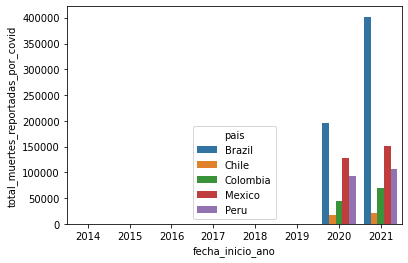

In [17]:
# As mortes por covid iniciam-se em 2020
sns.barplot(data=df_muertes_covid_agg_yearly, x='fecha_inicio_ano', y='total_muertes_reportadas_por_covid', hue='pais');

In [18]:
df_muertes_covid_final = df_muertes_covid_agg_yearly.loc[
    df_muertes_covid_agg_yearly['fecha_inicio_ano'] < 2019, ['pais', 'total_muertes_reportadas']
    ].groupby(by='pais').agg({'total_muertes_reportadas': 'median'}).astype(int).rename(
        columns={'total_muertes_reportadas': 'total_muertes_reportadas_median_2014_2019'}
        ).reset_index()

# variável temporária para armazenar a tabela agregada com cálculos de 2021.
temp_2021 = df_muertes_covid_agg_yearly.loc[
    df_muertes_covid_agg_yearly['fecha_inicio_ano'] == 2021, ['pais', 'total_muertes_reportadas', 'total_muertes_reportadas_por_covid']
    ].groupby(by='pais').agg({'total_muertes_reportadas': 'sum', 'total_muertes_reportadas_por_covid': 'sum'}).astype(int).rename(
        columns={'total_muertes_reportadas': 'total_muertes_reportadas_2021', 'total_muertes_reportadas_por_covid': 'total_muertes_reportadas_por_covid_2021'}
        ).reset_index()

df_muertes_covid_final[]

df_muertes_covid_final

SyntaxError: invalid syntax (Temp/ipykernel_1748/503971898.py, line 14)

### 2. Un gráfico que muestre los datos de la tabla anterior en forma de gráfico de barras.

### 3. Un gráfico por cada país que muestre el comparativo de la evolución en el tiempo de las muertes reportadas COVID-19 vs. el cálculo de “exceso de muertes” semana a semana, ambos datos por cada 100 mil habitantes.

In [ ]:
df_muertes_covid

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid,fecha_inicio_ano,fecha_inicio_ano_mes,periodo_com_covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,2014,201412,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,2015,201501,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,2015,201501,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,2015,201501,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,2015,201501,0
...,...,...,...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,2021,202105,1
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,2021,202106,1
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,2021,202107,1
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,2021,202108,1


In [ ]:
# Change the style of plot
sns.set_context("paper")

C:\Users\gusta\AppData\Local\Temp/ipykernel_18276/3749195006.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=df_muertes_covid_2020['ano_semana'].unique(), rotation=90);


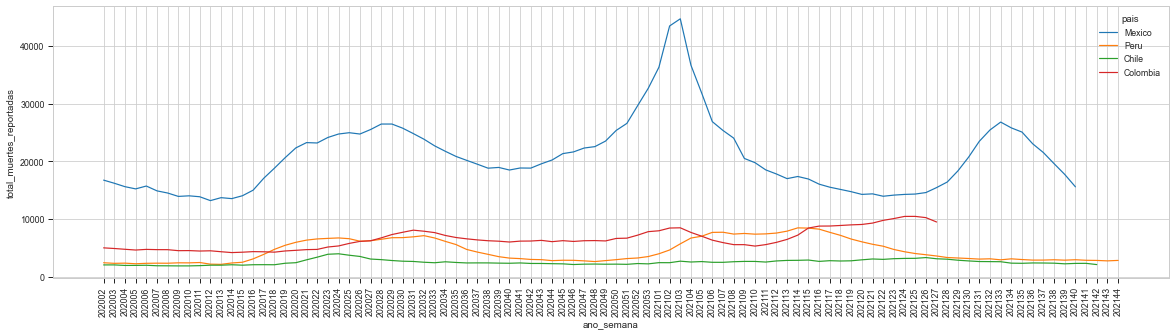

In [ ]:
df_muertes_covid_2020 = df_muertes_covid.loc[df_muertes_covid['fecha_inicio_ano']>2019, ['pais', 'fecha_inicio_ano', 'semana','total_muertes_reportadas', 'total_muertes_reportadas_por_covid']]

df_muertes_covid_2020['ano_semana'] = df_muertes_covid_2020['fecha_inicio_ano'].astype(str) + df_muertes_covid_2020['semana'].astype(str).str.zfill(2)

df_muertes_covid_2020.drop(columns=['fecha_inicio_ano', 'semana'], inplace=True)

plt.rcParams["figure.figsize"] = [20, 5]
ax = sns.lineplot(data=df_muertes_covid_2020.loc[df_muertes_covid_2020['pais']!='Brazil'], x='ano_semana', y='total_muertes_reportadas', hue='pais');
ax.set_xticklabels(labels=df_muertes_covid_2020['ano_semana'].unique(), rotation=90);

### 4. Un gráfico por cada país que muestre las mismas variables que el punto anterior, pero acumuladas en el tiempo.

In [19]:
from pandas_profiling import ProfileReport

In [21]:
profile = ProfileReport(df_muertes_covid, title="Relatório de Estatística Descritiva",
                        explorative=True)

# profile.to_notebook_iframe();

# plotando com widgets
# profile.to_widgets();

In [22]:
profile.to_file("relatorio_estatistica_descritiva.html");

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]
